In [19]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
dataset = pd.read_csv('kc_house_data.csv')
dataset.shape
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [25]:
dataset=dataset.drop(['id','date','lat','long'],axis = 1 )
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [31]:
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built','yr_renovated', 'sqft_living15', 'sqft_lot15']
labels = dataset['price'].values
features = dataset[list(columns)].values

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)

intercept 6244625.006221301
Cof [-4.00924646e+04  4.76323881e+04  1.14812610e+02 -8.82450869e-02
  2.19247891e+04  6.56472148e+05  4.28065239e+04  1.85893752e+04
  1.20796700e+05  5.86965485e+01  5.61160611e+01 -3.59634786e+03
  6.09095524e+00  1.46668200e+01 -4.67948194e-01]
         Actual     predicted
0      324950.0  2.762400e+05
1      340000.0  5.060695e+05
2      575000.0  5.063246e+05
3      352800.0  3.493608e+05
4     1500000.0  1.197691e+06
...         ...           ...
6479   830000.0  8.744508e+05
6480   460000.0  3.583075e+05
6481   469000.0  2.214171e+05
6482   568000.0  4.349448e+05
6483   630000.0  6.005180e+05

[6484 rows x 2 columns]
Mean Absolute Error: 140505.31483105666
Mean Squared Error :  42227368004.95098
Root mean squared error :  205492.98772695623


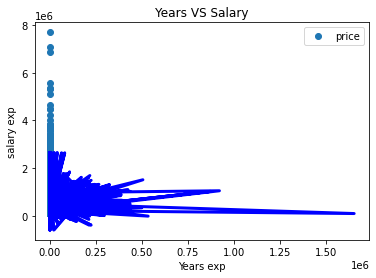

In [56]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import classification_report

regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)
print("intercept",regr.intercept_)
print("Cof",regr.coef_)

y_pred = regr.predict(X_test)  

df =pd.DataFrame({'Actual':y_test,'predicted':y_pred})
print(df)


from sklearn import metrics 

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error : ',metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error : ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

dataset.plot(x='bedrooms',y='price',style='o')
plt.title('Years VS Salary')
plt.xlabel('Years exp')
plt.ylabel('salary exp')
plt.plot(X_test,y_pred,color="blue",linewidth=3)
plt.show()